# Census Income Project
## Problem Statement:


This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler, power_transform
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, plot_roc_curve
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('census_income.csv')
data

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
data.shape

(32560, 15)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
data.isna().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [6]:
data.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

## Basic Data Description

* Data has 15 columns & 32560 Rows.
* No Missing values in the data set.
* 9 columns out of 15 columns are object data type columns including the target column.
1. Workclass
2. Education
3. Marital_status
4. Occupation
5. Relationship
6. Race
7. Sex
8. Native_country
9. Income
* Rest of columns are integer data type.
* Since the Problem Statement State that the prediction task is to determine whether a person makes over $50k/month or not, our target column is Income & we need to predct the income.

The data is overall good no missing values were found, Data need not required much data cleaning. We need to handle object data types column and EDA part if we will find anything important in EDA part than we will act accordingly.

# Exploratory Data Analysis.

### 1. Age.

In [7]:
data['Age'].describe()

count    32560.000000
mean        38.581634
std         13.640642
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: Age, dtype: float64

The information from the description is noted as follows:
* Age column represents the age in years of the person.
* Data from minimum value to 75% is distributed quite perfactly.
* Standard deviation of the data is quite high than the normal devaition as we can maximum age is 90.
* We will plot the distribution plot & boxlot for the column to see the data distribution and outliers in the column. And we wil act accordingly.

<AxesSubplot:xlabel='Age', ylabel='Density'>

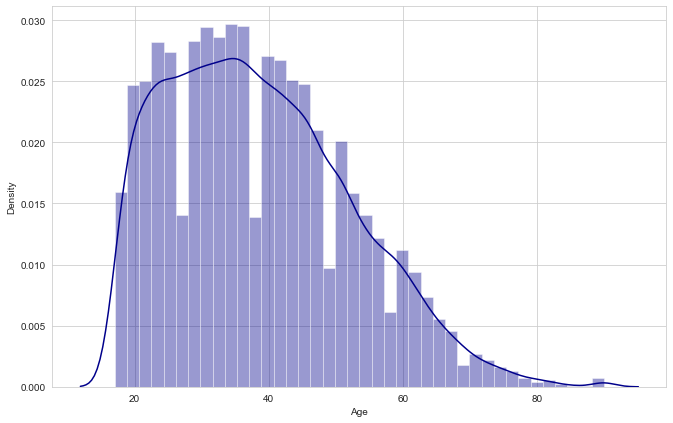

In [8]:
plt.figure(figsize = (11,7))
sns.set_style('whitegrid')
sns.distplot(data['Age'], color = 'darkblue', bins = 40, kde = True)

Data is little right skewed. Mean range is very high in counts that is why even the gap between 75% of the data and highest of the data is large, standard devaiation of the data is 1/3rd of the mean.

<AxesSubplot:xlabel='Age'>

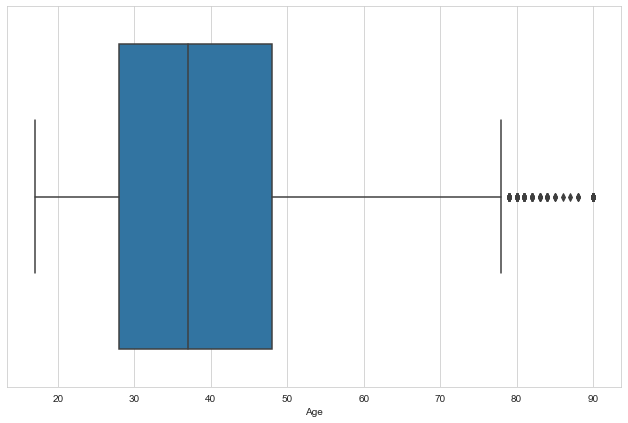

In [9]:
plt.figure(figsize = (11,7))
sns.set_style('whitegrid')
sns.boxplot(data['Age'])

Boxplot is clearly showing the outliers somewhere around above 78 years age. We will fix this after the EDA.

### 2. Workclass.

In [10]:
data['Workclass'].describe()

count        32560
unique           9
top        Private
freq         22696
Name: Workclass, dtype: object

In [11]:
data['Workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

The information of the ```Workclass``` column is noted as follows:
* **Workclass** column represents the employement type of the person.
* It's a categorical column having 9 categories of employement.
* Column has object data type.
* Since the column is categorical we will plot a count plot to see the dta distrbution along with 9 categories in the column.

<AxesSubplot:xlabel='Workclass', ylabel='count'>

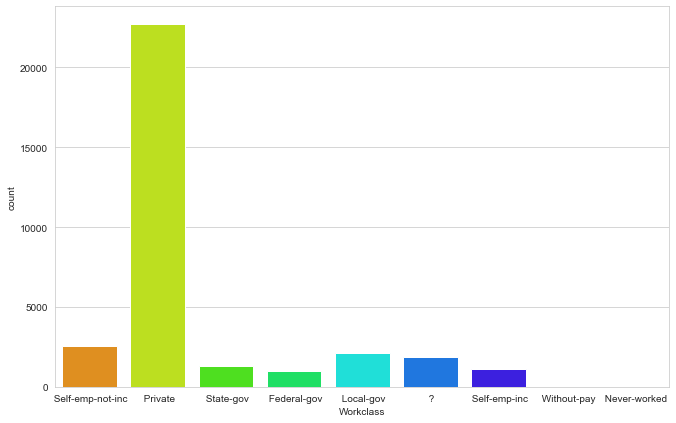

In [12]:
plt.figure(figsize = (11,7))
sns.set_style('whitegrid')
sns.countplot(data['Workclass'], palette = 'hsv')

* Working Professionals under private sector are more than any category.
* 70% perofessionals comes under Private category, rest of 30% are divided in rest 8 categories.
* There is also 2 categories named with Without-pay & Never-worked who have only 14 & 7 people under it.
* There is a category named with **?** we will consider it as other category.

### 3. Fnlwgt.

In [13]:
data['Fnlwgt'].describe()

count    3.256000e+04
mean     1.897818e+05
std      1.055498e+05
min      1.228500e+04
25%      1.178315e+05
50%      1.783630e+05
75%      2.370545e+05
max      1.484705e+06
Name: Fnlwgt, dtype: float64

<AxesSubplot:xlabel='Fnlwgt', ylabel='Density'>

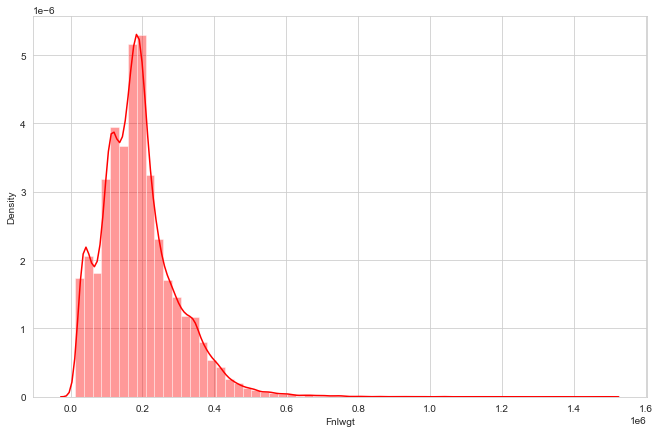

In [14]:
plt.figure(figsize = (11,7))
sns.distplot(data['Fnlwgt'],bins = 60, color = 'red')

<AxesSubplot:xlabel='Fnlwgt'>

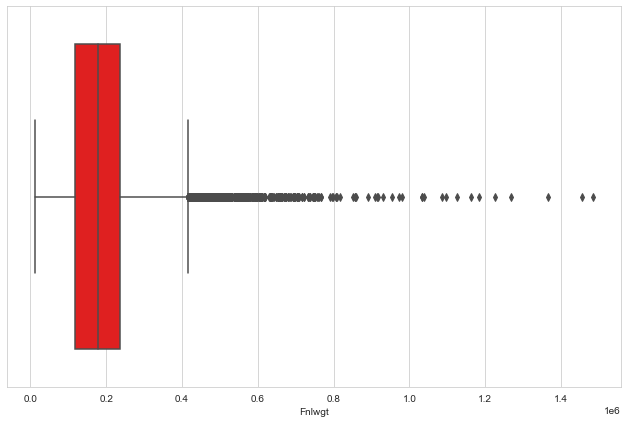

In [15]:
plt.figure(figsize = (11,7))
sns.boxplot(data['Fnlwgt'], color = 'red')

* The distribution plot of the column is showing a long right skewed data is present in the column.
* Box plot is showing  too much outliers data present in the right side of the box.
* We will fix this after EDA.

### 4. Education.

In [16]:
data['Education'].describe()

count        32560
unique          16
top        HS-grad
freq         10501
Name: Education, dtype: object

In [17]:
data['Education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

Information of ```Education``` column is noted as follows:
* Education column represents the type of education a person had.
* This column is a categorical column and the data type of the column is object data type.
* This column has 16 categories of different-different education qualification.
* HS-Grad has highest counts
* While preschool has least counts.
* Since the data in the column is categorical, we will plot the countplot to see the data distribution in the column of all 16 categories.

(array([    0.,  2000.,  4000.,  6000.,  8000., 10000., 12000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

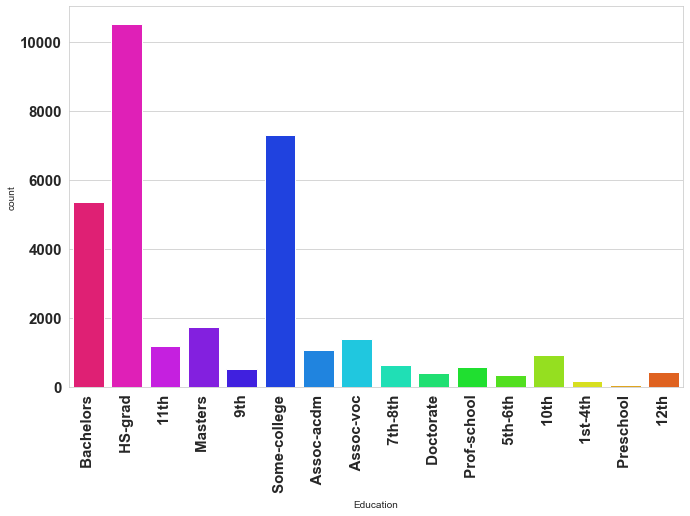

In [18]:
plt.figure(figsize = (11,7))
sns.countplot(data['Education'], palette = 'hsv_r')
plt.xticks(rotation = 90, fontweight = 'bold', fontsize = 15)
plt.yticks(fontweight = 'bold', fontsize = 15)

* We can see that there are 3 categories in the column which have larger data, Bachelors, HS-grad & Some-college.
* Other than these 3 categories, all categories have data very lesser and quite normally distributed.
* Only 1st - 4th & Preschool has very lessar data.

### 5. Education_num.

In [19]:
data['Education_num'].describe()

count    32560.000000
mean        10.080590
std          2.572709
min          1.000000
25%          9.000000
50%         10.000000
75%         12.000000
max         16.000000
Name: Education_num, dtype: float64

In [20]:
data['Education_num'].value_counts()

9     10501
10     7291
13     5354
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: Education_num, dtype: int64

(array([    0.,  2000.,  4000.,  6000.,  8000., 10000., 12000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

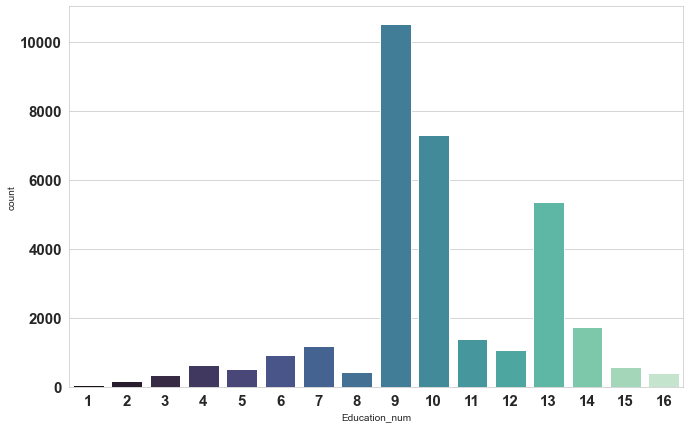

In [21]:
plt.figure(figsize = (11,7))
sns.countplot(data['Education_num'], palette = 'mako')
plt.xticks(fontweight = 'bold', fontsize = 15)
plt.yticks(fontweight = 'bold', fontsize = 15)

Information of ```Education_num``` noted as follows:-
* Seems like Education_num is number denoted to education of the person.
* The counts of number in Education_num is matches with the count of categories in Education column.
* We will plot the relation countplot of Education and Education_num to prove this & we'll analyze if they are same or not.

(array([    0.,  2000.,  4000.,  6000.,  8000., 10000., 12000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

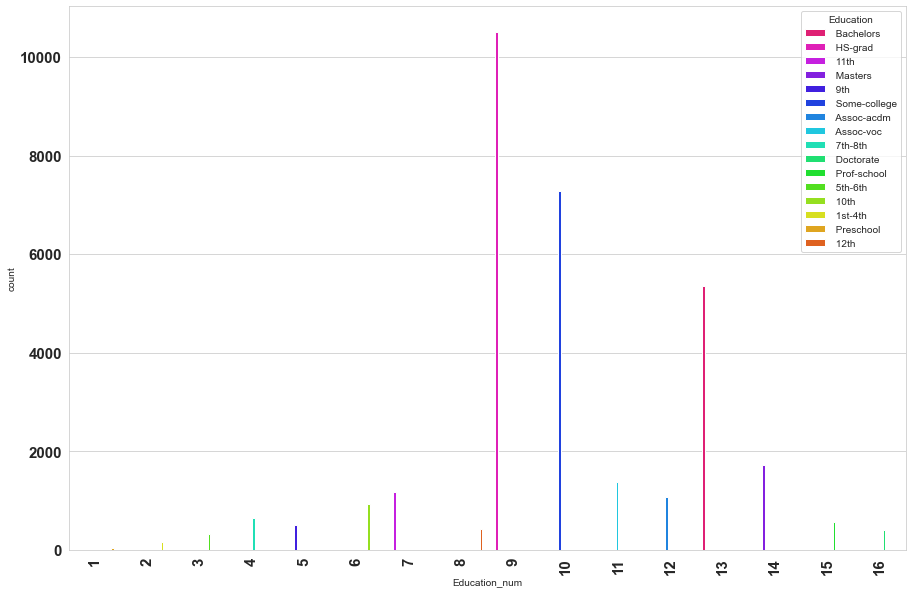

In [22]:
plt.figure(figsize = (15,10))
sns.countplot(data['Education_num'], hue = data['Education'], palette = 'hsv_r')
plt.xticks(rotation = 90, fontweight = 'bold', fontsize = 15)
plt.yticks(fontweight = 'bold', fontsize = 15)

Result has come as expected. Below points has been noted:
* We can see that in education column HS-grad has the highest number of the counts, & in Education_num 9 number has the highest count & when we plot the relational countplot of the both column we see that on 9 there is a bar of voilet color & voilet color bar represents the HS-grad.
* Same we can see with number 13, it's third highest counts in Education column, in Education 3rd highest counts is of Bachelors & nuber 13 has red color bar which denoted the Bachelors.

### 6. Marital_status

In [23]:
data['Marital_status'].describe()

count                   32560
unique                      7
top        Married-civ-spouse
freq                    14976
Name: Marital_status, dtype: object

In [24]:
data['Marital_status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

Information of ```Marital_status``` column is noted as follows:
* Marital_status column represents as name itself suggest the marital status(Marriage) of the person.
* This column is categorical column having 7 categories of marital status.
* Data type of the column is Object data type.
* Married-civ-spouse = civilian spouse. (Spouse is normal civilian)
* Married-spouse-absent = absent spouse means married but spouse is living some other place because of some work or professional reason. Not saperated.
* Married-AF-spouse = spouse is in Armed Force

(array([    0.,  2000.,  4000.,  6000.,  8000., 10000., 12000., 14000.,
        16000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

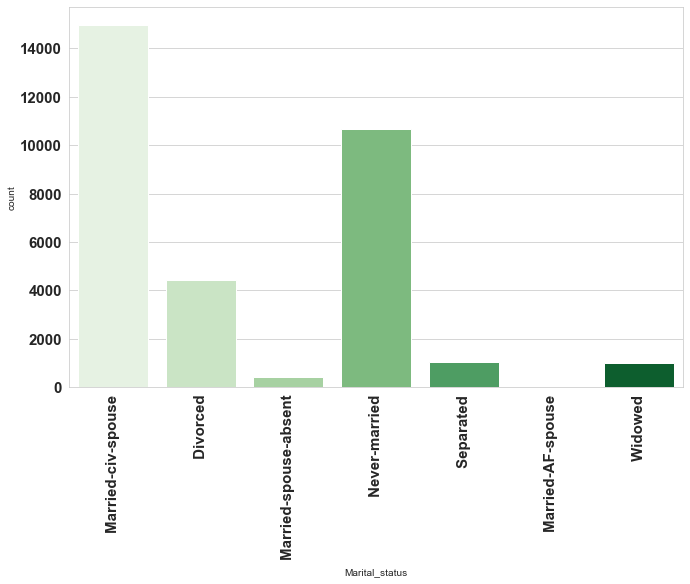

In [25]:
plt.figure(figsize = (11,7))
sns.countplot(data['Marital_status'], palette = 'Greens')
plt.xticks(rotation = 90, fontweight = 'bold', fontsize = 15)
plt.yticks(fontweight = 'bold', fontsize = 15)

Following points has been noted:
* Married with civilian spouse has the highest counts.
* Never Married or Unmarried people are the second highest.
* Married with or spouse in Armed Force has the very least counts.
* There are also some people second least whose spouse are living some other place because of professional reason or may be another reason termed as Married-absent-spouse.

### 7. Occupation.

In [26]:
data['Occupation'].describe()

count               32560
unique                 15
top        Prof-specialty
freq                 4140
Name: Occupation, dtype: object

In [27]:
data['Occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

Information about ```Occupation``` column is noted as follows:
* Occupation column represents the professional occupation of the person.
* This column is a categorical column having 15 categories of the professional occupations.
* The data type of the column is object data type.
* Since the data is categorical in the column we will plot the count plot to see the data distribution in each categories.

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500., 4000.,
        4500.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

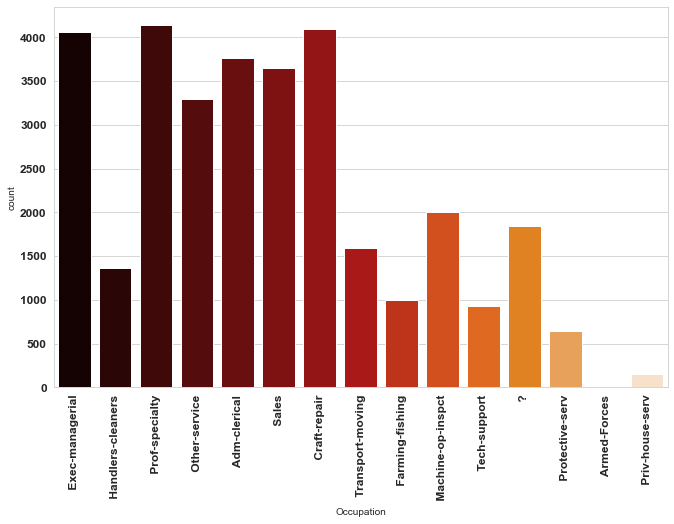

In [28]:
plt.figure(figsize = (11,7))
sns.countplot(data['Occupation'], palette = 'gist_heat')
plt.xticks(rotation = 90, fontweight = 'bold', fontsize = 12)
plt.yticks(fontweight = 'bold', fontsize = 12)

Following points has been noted:
* Prof-speciality has the highest counts.
* count Range of Prof-speciality, Exec-managerial & Craft-repair is same.
* Armed-force has the least count.

### 8. Relationship.

In [29]:
data['Relationship'].describe()

count        32560
unique           6
top        Husband
freq         13193
Name: Relationship, dtype: object

In [30]:
data['Relationship'].value_counts()

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64

The information about ```Relationship``` column is noted as follows:
* Relationship column represents the what role of relationship of the person is, in his/her self derived family.
* This column is a categorical column having 6 categories of relationships.
* The data type of the colun is object data type.
* Since the column is categorical we will plot the countplot to see the data distributions in the cactegories of the column.

(array([    0.,  2000.,  4000.,  6000.,  8000., 10000., 12000., 14000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

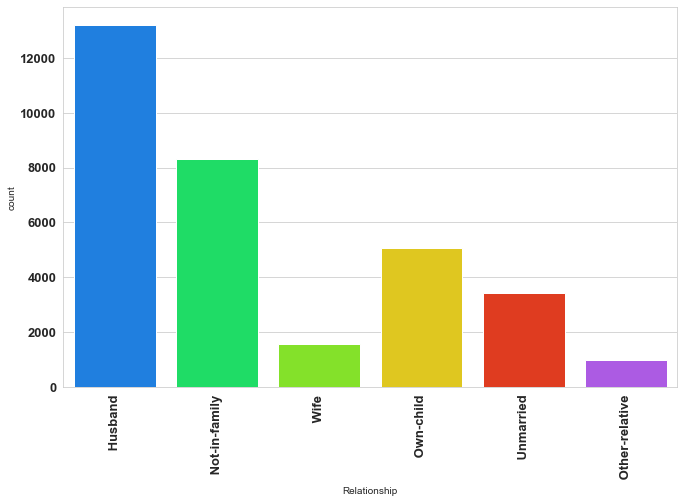

In [31]:
plt.figure(figsize = (11,7))
sns.countplot(data['Relationship'], palette = 'gist_ncar')
plt.xticks(rotation = 90, fontweight = 'bold', fontsize = 13)
plt.yticks(fontweight = 'bold', fontsize = 13)

Following points has been noted:
* We can see that most of the people are husbands in the family.
* One who owns the child has the priority with the child as Own-Child, offcourse he/shee is also husband/wife but now child has given the relation priority over spouse.

### 9. Race.

In [32]:
data['Race'].describe()

count      32560
unique         5
top        White
freq       27815
Name: Race, dtype: object

In [33]:
data['Race'].value_counts()

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

Information about ```Race``` column is noted as follows:
* Race column represents from which race the person comes from.
* This column is a categorical column having 5 categories of the Race of the people.
* The data type of the column is object data type.
* since the colun is categorical column we will plot the countplot to see the data distribution in categories of the colun.

(array([    0.,  5000., 10000., 15000., 20000., 25000., 30000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

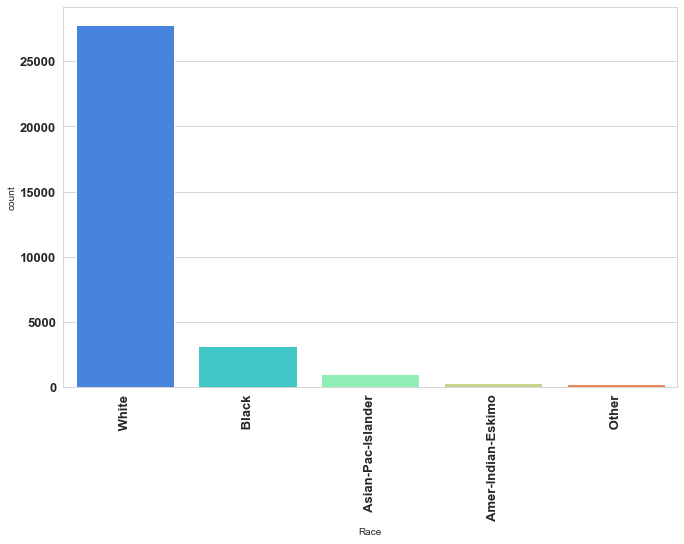

In [34]:
plt.figure(figsize = (11,7))
sns.countplot(data['Race'], palette = 'rainbow')
plt.xticks(rotation = 90, fontweight = 'bold', fontsize = 13)
plt.yticks(fontweight = 'bold', fontsize = 13)

Following points haas been noted:
* White race people has the highest counts.
* Some people's Race has been categorised as Other and it has the least counts.
* Almost 88% people are of White Race & rest of 12% people are of 4 different race, Black, Asian Pacific Islander, American Indian Esikimo & Other.

### 10. Sex.

In [35]:
data['Sex'].describe()

count     32560
unique        2
top        Male
freq      21789
Name: Sex, dtype: object

In [36]:
data['Sex'].value_counts()

 Male      21789
 Female    10771
Name: Sex, dtype: int64

Information about ```Sex``` column is noted as follows:
* Sex Column Represents the gender of the person.
* This column is a categorical column having 2 categories of Gender.
* The data type of the column is Object data type.
* Since the data is categorical in this column we will plot the countplot to see the data distribution in the categories.

(array([    0.,  5000., 10000., 15000., 20000., 25000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

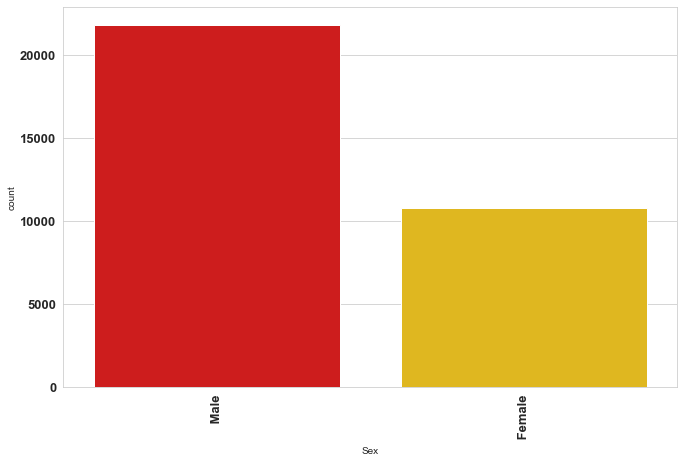

In [37]:
plt.figure(figsize = (11,7))
sns.countplot(data['Sex'], palette = 'hot')
plt.xticks(rotation = 90, fontweight = 'bold', fontsize = 13)
plt.yticks(fontweight = 'bold', fontsize = 13)

Following points has been noted:
* There is 21789 male.
* There is 10771 female.

### 11. Capital_gain.

In [38]:
data['Capital_gain'].describe()

count    32560.000000
mean      1077.615172
std       7385.402999
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: Capital_gain, dtype: float64

In [39]:
data['Capital_gain'].value_counts()

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
1639         1
5060         1
6097         1
1455         1
7978         1
Name: Capital_gain, Length: 119, dtype: int64

Information about ```Capita_gain``` column noted as follows:
* Capital gain column represents the financial gain or profit of the person.
* This column has continous data.
* Data Type of the column is Integer data type.
* Since the column is continous we will plot the distplot to see the data distribution & Boxplot to see the outliers in the column.

Text(0, 0.5, 'Density')

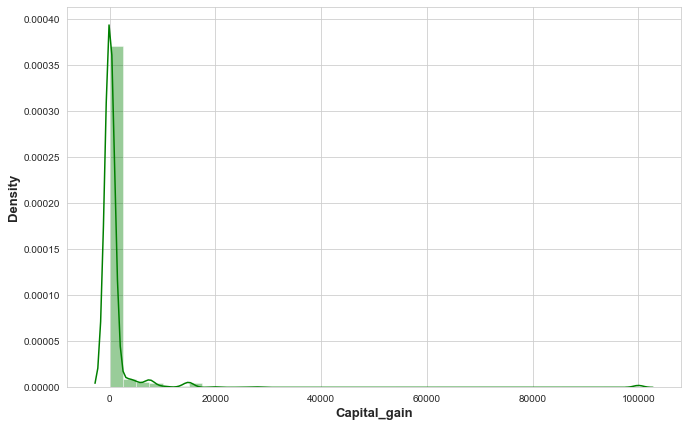

In [40]:
plt.figure(figsize = (11,7))
sns.distplot(data['Capital_gain'], bins = 40, color = 'green')
plt.xlabel('Capital_gain', fontweight = 'bold', fontsize = 13)
plt.ylabel("Density", fontweight = 'bold', fontsize = 13)

Since the 0 has highest counts in the column, data distribution is showing, distributed data on the position of 0. Apart from this the capital gain reaches till 100000, which is making it highly right skewed. We will plot the boxplot to see the amount of outliers in the column.

<AxesSubplot:xlabel='Capital_gain'>

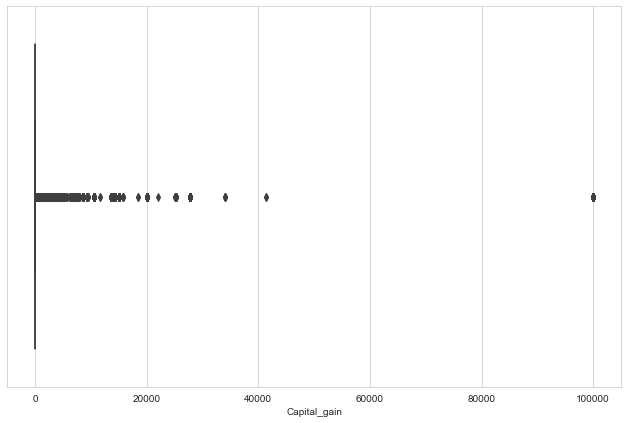

In [41]:
plt.figure(figsize = (11,7))
sns.boxplot(data['Capital_gain'])

Since 90% of the data belongs to 0, boxplot is showing all the points other than 0 as a outlier, we will remove the outliers greater than 20000 to normalize it at some point, we can't remove all the outliers because than the column's data would be saturated and will have only 0 and than the column will loose it's value it will not play any role in prediction of income in that case.

### 12. Capital_loss.

In [42]:
data['Capital_loss'].describe()

count    32560.000000
mean        87.306511
std        402.966116
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4356.000000
Name: Capital_loss, dtype: float64

In [43]:
data['Capital_loss'].value_counts()

0       31041
1902      202
1977      168
1887      159
1485       51
        ...  
2467        1
1539        1
155         1
2282        1
1411        1
Name: Capital_loss, Length: 92, dtype: int64

Information about ```Capital_loss``` column noted as follows:
* Capital_loss column represents the financial loss of the person.
* This column is also continous column.
* Data type of the column is integer data type.
* The data distribution in this column is almost similar to Capital_gain.
* We will plot the distribution plot to see the data distribution in the column.

<AxesSubplot:xlabel='Capital_loss', ylabel='Density'>

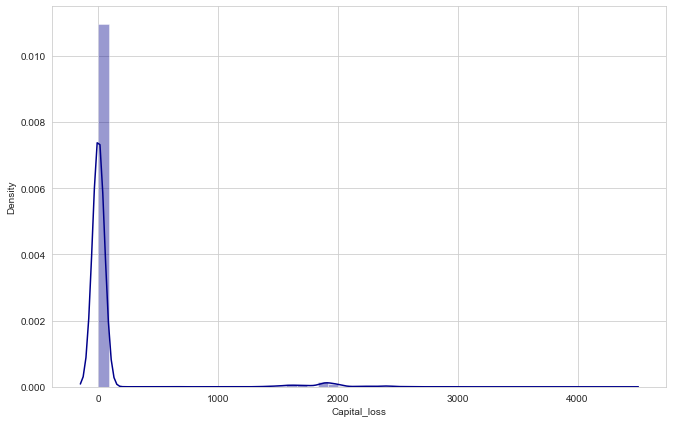

In [44]:
plt.figure(figsize = (11,7))
sns.distplot(data['Capital_loss'], color = 'darkblue')

<AxesSubplot:xlabel='Capital_loss'>

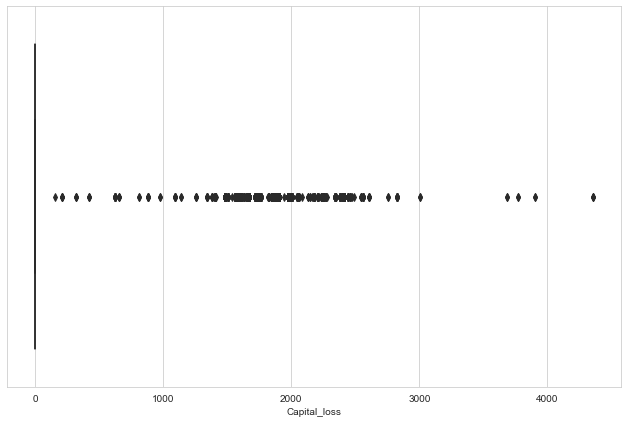

In [45]:
plt.figure(figsize = (11,7))
sns.boxplot(data['Capital_loss'], color = 'darkblue')

Same like Capital_gain column more than 90% data belongs to number 0 only and hance all the points other than 0 is outlier. We will fix this issue in preprocessing part.

### 13. Hours_per_week.

In [46]:
data['Hours_per_week'].describe()

count    32560.000000
mean        40.437469
std         12.347618
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: Hours_per_week, dtype: float64

In [47]:
data['Hours_per_week'].value_counts()

40    15216
50     2819
45     1824
60     1475
35     1297
      ...  
92        1
74        1
94        1
82        1
87        1
Name: Hours_per_week, Length: 94, dtype: int64

Information about ```Hours_per_week``` column noted as follows:
* Hours_per_week column represents the working hours in a week of the person.
* Minimum working hour in a week, in the column is 1 hour.
* Maximum working hour in a week in the column is 99 hours.
* We can see that mean hour of working in the column is 40 hours.

Let's plot the distribution plot to see the data distribution in the column.

<AxesSubplot:xlabel='Hours_per_week', ylabel='Density'>

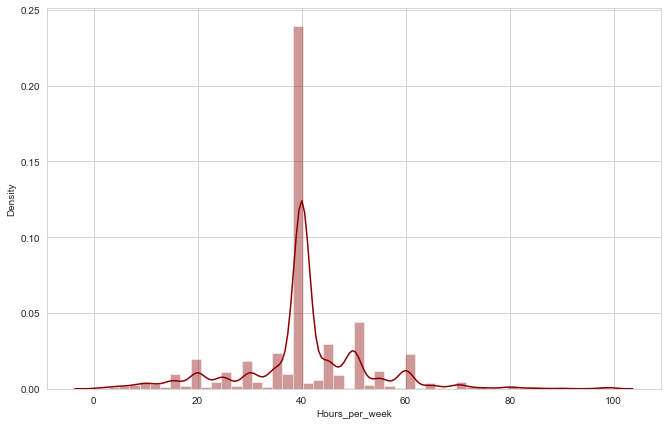

In [48]:
plt.figure(figsize = (11,7))
sns.distplot(data['Hours_per_week'], color = 'darkred')

From the distplot we can see that why the mean value is 40.43, because maximum data points belongs to 40 hours per week. Since the minimum and maximum range is from 1 to 99 and approx 48% data belongs to only 40, the data is both right and left skewed.
The oxplot will show the outliers in oth side, let's see.


<AxesSubplot:xlabel='Hours_per_week'>

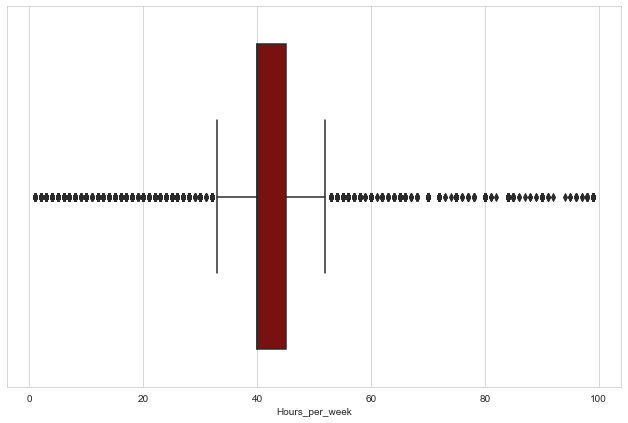

In [49]:
plt.figure(figsize = (11,7))
sns.boxplot(data['Hours_per_week'], color = 'darkred')

As expected the data has outliers on both side. we will fix this issue in the preprocessing part.

### 14. Native_country.

In [50]:
data['Native_country'].describe()

count              32560
unique                42
top        United-States
freq               29169
Name: Native_country, dtype: object

In [51]:
data['Native_country'].value_counts()

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

Infomation about ```Native_country``` column is noted as follows:
* Native_country column represents origin country of the people.
* Since the survey is of United State America, more than 90% people are from USA.
* Apart from USA people are from 41 different countries as well.
* This column is categorical column having 42 categories of country people belongs from.
* Data type of the column is Object.
* Since it is a categorical column we will plot the countplot to see the data distribution.

(array([    0.,  5000., 10000., 15000., 20000., 25000., 30000., 35000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

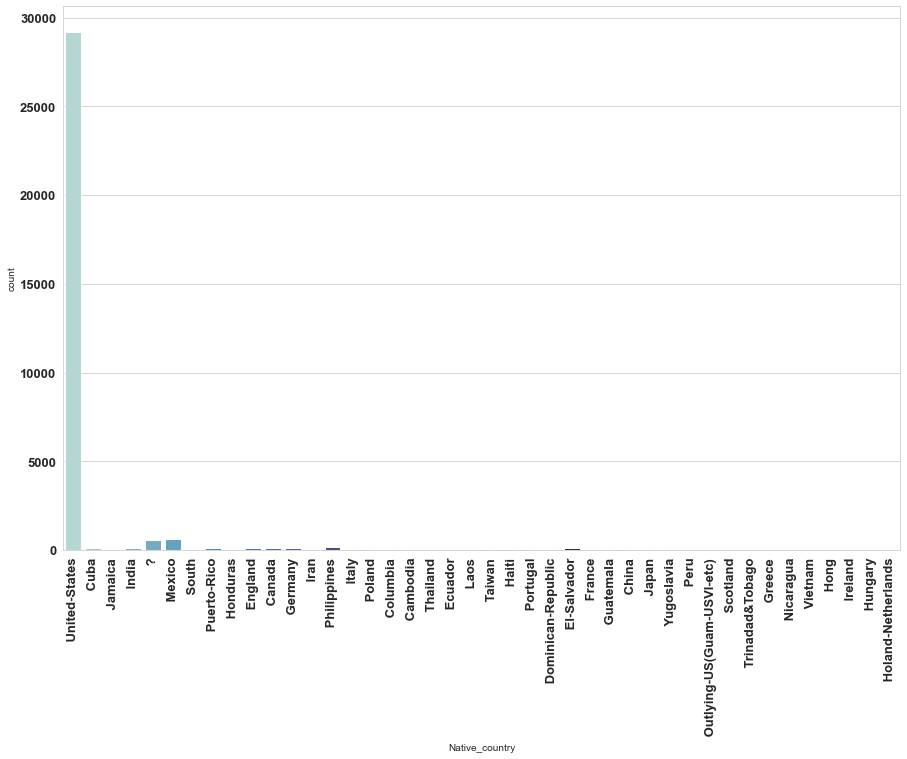

In [52]:
plt.figure(figsize = (15,10))
sns.countplot(data['Native_country'], palette = 'icefire')
plt.xticks(rotation = 90, fontweight = 'bold', fontsize = 13)
plt.yticks(fontweight = 'bold', fontsize = 13)

Following points has been noted:
* More than 90% people are of America.
* Apart from America those bars of country are visible in the countplot has population from 100 to 650.
* And rest of the country has population less than 100 in this survey.

In [53]:
data.head(2)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


### 15. Income.

In [54]:
data['Income'].describe()

count      32560
unique         2
top        <=50K
freq       24719
Name: Income, dtype: object

In [55]:
data['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

Information about ```Income``` column is noted as follows:
* Income column is our target column which we have to predict in this Census Income Project.
* It is a categorical column having 2 categories of income, 1) Less than or equal to 50k doller. 2) Greater than 50k doller.
* Less than or equal to 50k doller has 24719 counts & Greater than 50k doller has 7841 counts. It shows that our class data is highly imbalaned. We need to balance this column.
* Since it is categorical column we will plot the countplot to visualize the data.

(array([    0.,  5000., 10000., 15000., 20000., 25000., 30000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

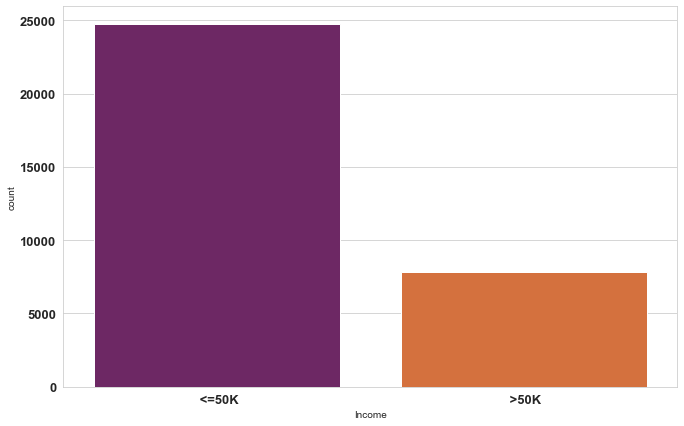

In [56]:
plt.figure(figsize = (11,7))
sns.countplot(data['Income'], palette = 'inferno')
plt.xticks(fontweight = 'bold', fontsize = 13)
plt.yticks(fontweight = 'bold', fontsize = 13)

# Data Preprocessing.

## Removing skewness.

In [57]:
# checking skewness
data.skew()

Age                0.558738
Fnlwgt             1.446972
Education_num     -0.311630
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
dtype: float64

We can see that exept Hours_per_week column & Education_num column all the column has skewness. Hours_per_week column has skewness score 0.22, which means it's data distribution is symmetric & we have seen that it is symmetric but both left & right tails are long we will apply power_transform on Hours_perweek as well. If we talk about Age column is has skeweness score 0.55 which is greater than 0.5, we are going to consider this column in power transform as well. We already have seen that though Education_num has numeric data in it and it is like continouos data but we also have analyzed it as correspondence to categorical column Education so we are not going to consider this column in power_transform.

In [58]:
# saperating all continuous or skewed column in skewed_col to apply power_transform.
skewed_col = data.drop(columns = ['Workclass', 'Education', 'Education_num', 'Marital_status', 'Occupation',
                                  'Relationship', 'Race', 'Sex', 'Native_country', 'Income'])
skewed_col

,Age,Fnlwgt,Capital_gain,Capital_loss,Hours_per_week
0,50,83311,0,0,13
1,38,215646,0,0,40
2,53,234721,0,0,40
3,28,338409,0,0,40
4,37,284582,0,0,40
...,...,...,...,...,...
32555,27,257302,0,0,38
32556,40,154374,0,0,40
32557,58,151910,0,0,40
32558,22,201490,0,0,20


In [59]:
# applying power_transform yeo-johnson method to remove the skewness from the data, yeo-johnson because 0 is present in data.
new_skewed_col = power_transform(skewed_col, method = 'yeo-johnson')

# creating data frame of new powertransformed data after removing skewness
new_skewed_col = pd.DataFrame(new_skewed_col, columns = skewed_col.columns)

In [60]:
# checking new transformed column 
new_skewed_col

,Age,Fnlwgt,Capital_gain,Capital_loss,Hours_per_week
0,0.891947,-1.089889,-0.301370,-0.221213,-2.221515
1,0.102717,0.398743,-0.301370,-0.221213,-0.035570
2,1.064381,0.562540,-0.301370,-0.221213,-0.035570
3,-0.731663,1.340398,-0.301370,-0.221213,-0.035570
4,0.028023,0.957182,-0.301370,-0.221213,-0.035570
...,...,...,...,...,...
32555,-0.827983,0.746749,-0.301370,-0.221213,-0.197550
32556,0.247374,-0.193298,-0.301370,-0.221213,-0.035570
32557,1.334556,-0.219755,-0.301370,-0.221213,-0.035570
32558,-1.358341,0.271668,-0.301370,-0.221213,-1.654992


In [61]:
# cheking skeweness of transformed data
new_skewed_col.skew()

Age              -0.013897
Fnlwgt            0.016914
Capital_gain      3.016951
Capital_loss      4.299511
Hours_per_week    0.229556
dtype: float64

Skewness has been reduced significantly but column capital_gain & capital_loss had a lot of skewness & it has still skeness in it, now we will consider these transformed column ahead in model building.

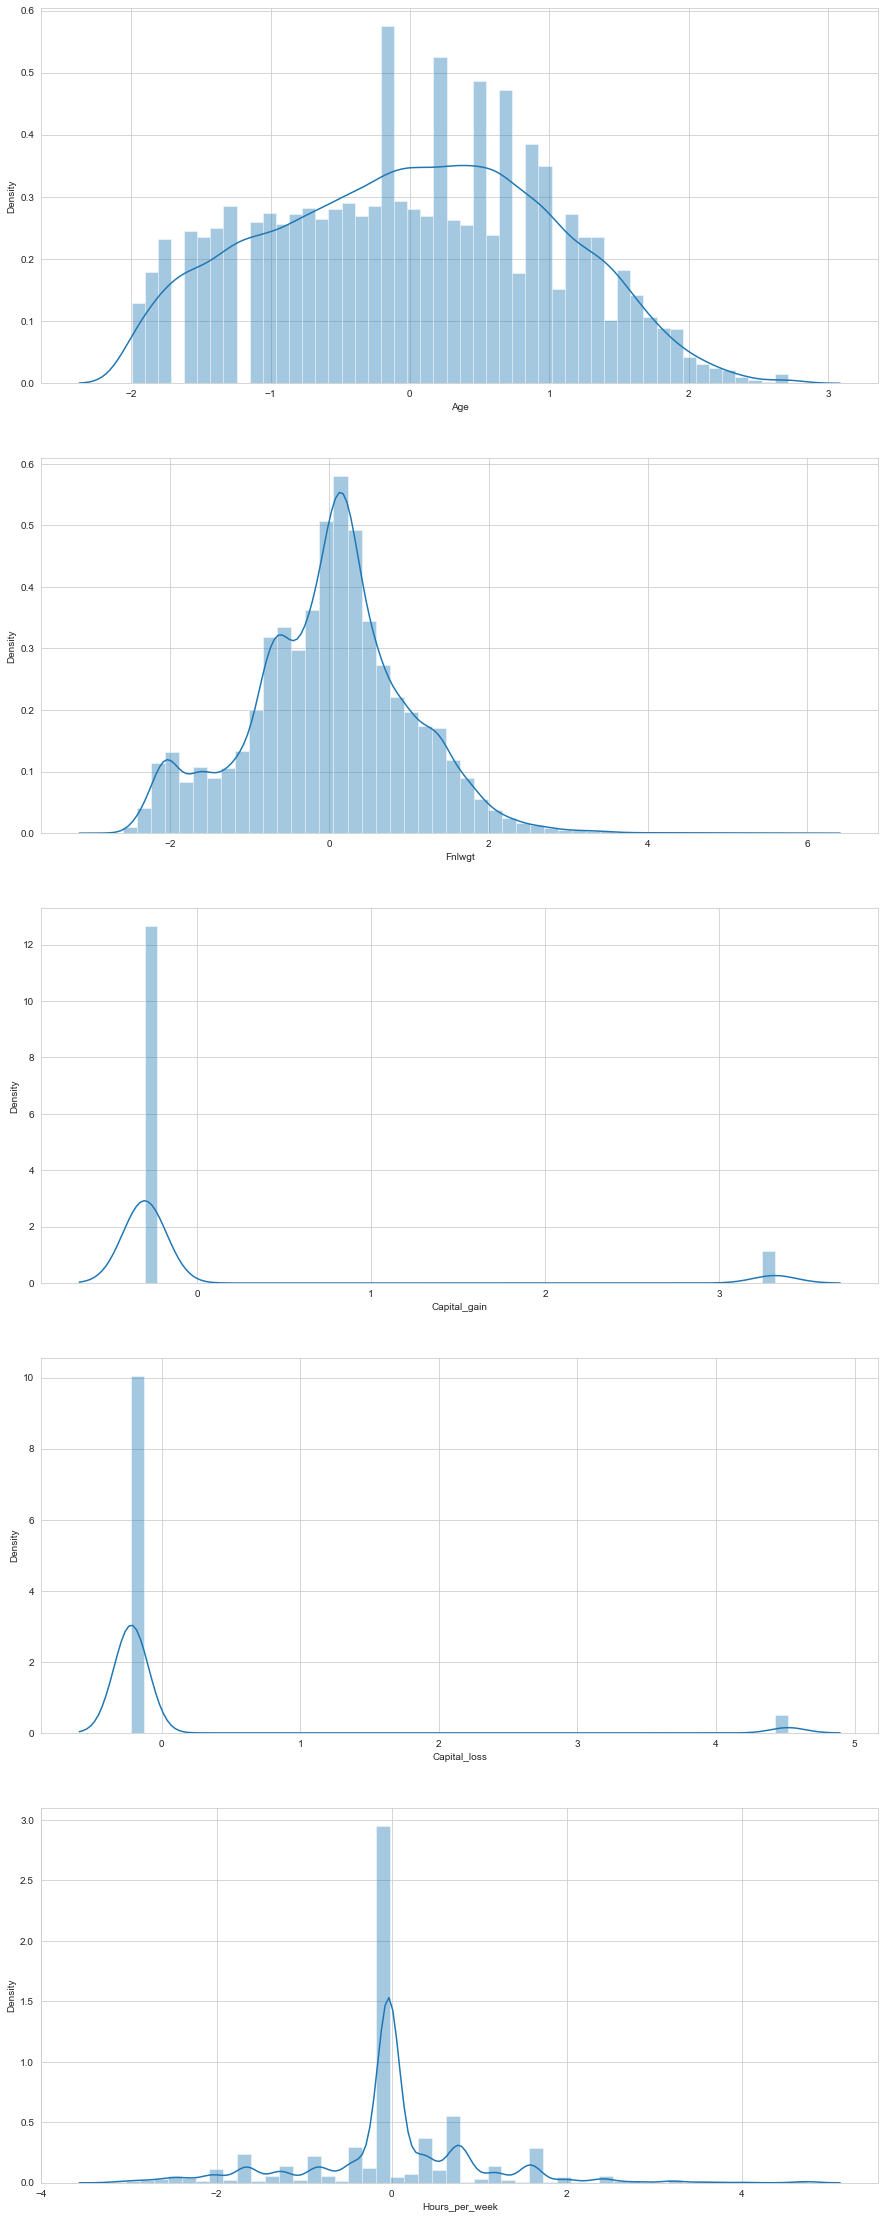

In [62]:
# Visualizing the skewed column after removing skeweness
plt.figure(figsize = (15,40))
plotnumber = 1

for column in new_skewed_col:
    if plotnumber <= 5:
        ax = plt.subplot(5,1, plotnumber)
        sns.distplot(new_skewed_col[column])
    plotnumber+=1
plt.show()

In [63]:
# removing the previous continouos columns from the data to concat the new transformed continuous column in the data
data = data.drop(columns = ['Age', 'Fnlwgt', 'Capital_gain', 'Capital_loss', 'Hours_per_week'])
data

,Workclass,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income
0,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
1,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
2,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
3,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
4,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...
32555,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
32556,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
32557,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
32558,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


In [64]:
# concating the new transformed column with other categorical columns in data
data = pd.concat([data, new_skewed_col], axis = 1, join = 'inner')
data

,Workclass,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income,Age,Fnlwgt,Capital_gain,Capital_loss,Hours_per_week
0,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K,0.891947,-1.089889,-0.301370,-0.221213,-2.221515
1,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K,0.102717,0.398743,-0.301370,-0.221213,-0.035570
2,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K,1.064381,0.562540,-0.301370,-0.221213,-0.035570
3,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K,-0.731663,1.340398,-0.301370,-0.221213,-0.035570
4,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States,<=50K,0.028023,0.957182,-0.301370,-0.221213,-0.035570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K,-0.827983,0.746749,-0.301370,-0.221213,-0.197550
32556,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K,0.247374,-0.193298,-0.301370,-0.221213,-0.035570
32557,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K,1.334556,-0.219755,-0.301370,-0.221213,-0.035570
32558,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K,-1.358341,0.271668,-0.301370,-0.221213,-1.654992


In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Workclass       32560 non-null  object 
 1   Education       32560 non-null  object 
 2   Education_num   32560 non-null  int64  
 3   Marital_status  32560 non-null  object 
 4   Occupation      32560 non-null  object 
 5   Relationship    32560 non-null  object 
 6   Race            32560 non-null  object 
 7   Sex             32560 non-null  object 
 8   Native_country  32560 non-null  object 
 9   Income          32560 non-null  object 
 10  Age             32560 non-null  float64
 11  Fnlwgt          32560 non-null  float64
 12  Capital_gain    32560 non-null  float64
 13  Capital_loss    32560 non-null  float64
 14  Hours_per_week  32560 non-null  float64
dtypes: float64(5), int64(1), object(9)
memory usage: 3.7+ MB


In [66]:
data.isna().sum()

Workclass         0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Native_country    0
Income            0
Age               0
Fnlwgt            0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
dtype: int64

## Encoding of object data types column into float.

In [67]:
# encoding the object data type feature columns into float data type with ordinal encoder &
# target column into integer with label encoding 
ord_enc = OrdinalEncoder()
lab_enc = LabelEncoder()
data['Workclass'] = ord_enc.fit_transform(data['Workclass'].values.reshape(-1,1))
data['Education'] = ord_enc.fit_transform(data['Education'].values.reshape(-1,1))
data['Marital_status'] = ord_enc.fit_transform(data['Marital_status'].values.reshape(-1,1))
data['Occupation'] = ord_enc.fit_transform(data['Occupation'].values.reshape(-1,1))
data['Relationship'] = ord_enc.fit_transform(data['Relationship'].values.reshape(-1,1))
data['Race'] = ord_enc.fit_transform(data['Race'].values.reshape(-1,1))
data['Sex'] = ord_enc.fit_transform(data['Sex'].values.reshape(-1,1))
data['Native_country'] = ord_enc.fit_transform(data['Native_country'].values.reshape(-1,1))
data['Income'] = lab_enc.fit_transform(data['Income'])

In [68]:
data.dtypes

Workclass         float64
Education         float64
Education_num       int64
Marital_status    float64
Occupation        float64
Relationship      float64
Race              float64
Sex               float64
Native_country    float64
Income              int32
Age               float64
Fnlwgt            float64
Capital_gain      float64
Capital_loss      float64
Hours_per_week    float64
dtype: object

All the object data type columns has been transformed into float & integer data type. Now our data set is fit to model building.

## Data Scaling.

In [69]:
# splitting the data into features and label column
x = data.drop(columns = ['Income'])
y = data['Income']

In [70]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

## Finding the Best Random State.

In [71]:
max_accu = 0
best_rs = 0

for i in range(1,2000):
    x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.30, random_state = i)
    log_reg = LogisticRegression()
    log_reg.fit(x_train, y_train)
    y_pred = log_reg.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    if accuracy > max_accu:
        max_accu = accuracy
        best_rs = i
print('Maximum Accuracy is ', max_accu, 'At Random State ', best_rs)

Maximum Accuracy is  0.8277027027027027 At Random State  243


## Creating Train Test Split.

In [72]:
# creating train test split for model building and model testing
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.30, random_state = 243)

Our Exploratery Data Analysis and Preprocessing part is done till here, we have created the train test split, found the best random State and scaled the feature data. Now we will start our model building process we will build 5 models for this data.
* Logistic Regression Model
* Knn Model
* Decision Tree Model
* Random Forest Model
* Support Vector Machine Model

After building the all 5 models we will cross validate it's accuracy and also will plot roc and auc curve to get best model for our data we will compare the minimum difference between model accuracy and cross validation score to the roc auc curve and will decide our best fit model accordingly.

# Machine Learning Model Building.

### Model 1. Logistic Regression.

In [73]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
y_pred_log = log_reg.predict(x_test)

print('Confusion Matrix for Logistic Regression Model is :\n\n', confusion_matrix(y_test, y_pred_log),'\n')

print('Accuracy Score for Logistic Regression Model is :\n\n', accuracy_score(y_test, y_pred_log),'\n')

print('Classification Report for the Logistic Regression :\n\n', classification_report(y_test, y_pred_log))

Confusion Matrix for Logistic Regression Model is :

 [[7021  467]
 [1216 1064]] 

Accuracy Score for Logistic Regression Model is :

 0.8277027027027027 

Classification Report for the Logistic Regression :

               precision    recall  f1-score   support

           0       0.85      0.94      0.89      7488
           1       0.69      0.47      0.56      2280

    accuracy                           0.83      9768
   macro avg       0.77      0.70      0.73      9768
weighted avg       0.82      0.83      0.81      9768



### Model 2. Knn Model.

In [74]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)

print('Confusion Matrix for Knn Model is :\n', confusion_matrix(y_test, y_pred_knn),'\n')
print('Accuracy Score for Knn Model is :\n', accuracy_score(y_test, y_pred_knn),'\n')
print('Classification Report for the Knn Model is :\n', classification_report(y_test, y_pred_knn),'\n')

Confusion Matrix for Knn Model is :
 [[6702  786]
 [ 884 1396]] 

Accuracy Score for Knn Model is :
 0.829033579033579 

Classification Report for the Knn Model is :
               precision    recall  f1-score   support

           0       0.88      0.90      0.89      7488
           1       0.64      0.61      0.63      2280

    accuracy                           0.83      9768
   macro avg       0.76      0.75      0.76      9768
weighted avg       0.83      0.83      0.83      9768
 



### Model 3. Decision Tree Classification.

In [75]:
DT = DecisionTreeClassifier()
DT.fit(x_train, y_train)
y_pred_dt = DT.predict(x_test)

print('Confusion Matrix for Decision Tree Model is :\n', confusion_matrix(y_test, y_pred_dt),'\n')
print('Accuracy Score for Decision Tree Model is :\n', accuracy_score(y_test, y_pred_dt),'\n')
print('Classification Report for Decision Tree Model is :\n', classification_report(y_test, y_pred_dt), '\n')

Confusion Matrix for Decision Tree Model is :
 [[6488 1000]
 [ 918 1362]] 

Accuracy Score for Decision Tree Model is :
 0.8036445536445537 

Classification Report for Decision Tree Model is :
               precision    recall  f1-score   support

           0       0.88      0.87      0.87      7488
           1       0.58      0.60      0.59      2280

    accuracy                           0.80      9768
   macro avg       0.73      0.73      0.73      9768
weighted avg       0.81      0.80      0.80      9768
 



### Model 4. Random Forest Classification.

In [90]:
RF = RandomForestClassifier()
RF.fit(x_train, y_train)
y_pred_rf = RF.predict(x_test)

print('Confusion Matrix for Random Forest Model is :\n', confusion_matrix(y_test, y_pred_rf),'\n')
print('Accuracy Score for Random Forest Model is :\n', accuracy_score(y_test, y_pred_rf),'\n')
print('Classification Report for the Random Forest Model is :\n', classification_report(y_test, y_pred_rf))

Confusion Matrix for Random Forest Model is :
 [[6984  504]
 [ 868 1412]] 

Accuracy Score for Random Forest Model is :
 0.8595413595413596 

Classification Report for the Random Forest Model is :
               precision    recall  f1-score   support

           0       0.89      0.93      0.91      7488
           1       0.74      0.62      0.67      2280

    accuracy                           0.86      9768
   macro avg       0.81      0.78      0.79      9768
weighted avg       0.85      0.86      0.86      9768



### Model 5. Support Vector Machine Classification.

In [77]:
svc = SVC()
svc.fit(x_train, y_train)
y_pred_svc = svc.predict(x_test)

print('Confusion Matrix for the Support Vector Model is :\n', confusion_matrix(y_test, y_pred_svc),'\n')
print('Accuracy Score for the Support Vector Model is :\n', accuracy_score(y_test, y_pred_svc),'\n')
print('Classification Report for the Support Vector Model is :\n', classification_report(y_test, y_pred_svc))

Confusion Matrix for the Support Vector Model is :
 [[6962  526]
 [1032 1248]] 

Accuracy Score for the Support Vector Model is :
 0.8404995904995906 

Classification Report for the Support Vector Model is :
               precision    recall  f1-score   support

           0       0.87      0.93      0.90      7488
           1       0.70      0.55      0.62      2280

    accuracy                           0.84      9768
   macro avg       0.79      0.74      0.76      9768
weighted avg       0.83      0.84      0.83      9768



Random Forest Classification Model has given the best score which is 85.87%

# Cross Validation of Models.

In [78]:
# cross validation for Logistic Regression Model
cvs = cross_val_score(log_reg, x_scaled, y, cv = 10)
print('Cross Validation mean score for Logistic Regression model is :', cvs.mean())

Cross Validation mean score for Logistic Regression model is : 0.8167997542997544


In [79]:
# cross validation for Knn Model
cvs = cross_val_score(knn, x_scaled, y, cv = 10)
print('Cross Validation mean score for K-Nearest Neighbor model is :', cvs.mean())

Cross Validation mean score for K-Nearest Neighbor model is : 0.8248157248157248


In [80]:
# cross validation for Decision Tree model
cvs = cross_val_score(DT, x_scaled, y, cv = 10)
print('Cross Validation ean score for Decision Tree model is :', cvs.mean())

Cross Validation ean score for Decision Tree model is : 0.8039619164619165


In [81]:
# cross validation for Random Forest Model
cvs = cross_val_score(RF, x_scaled, y, cv = 10)
print('Cross Validation mean Score for Random Forest Model is :', cvs.mean())

Cross Validation mean Score for Random Forest Model is : 0.8522727272727273


In [82]:
# cross validation for support vector machine model 
cvs = cross_val_score(svc, x_scaled, y, cv = 10)
print('Cross Validation mean score for Support Vector Classification Model is :', cvs.mean())

Cross Validation mean score for Support Vector Classification Model is : 0.837438574938575


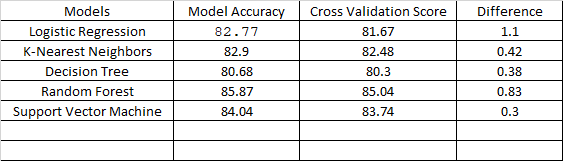

Support Vector Classification Model has minimum difference between Model accuracy and Cross Validation Mean score, which is 0.3. Now we will plot roc_auc curve to see which model has highest area under the curve.

# AUC & ROC Curve.

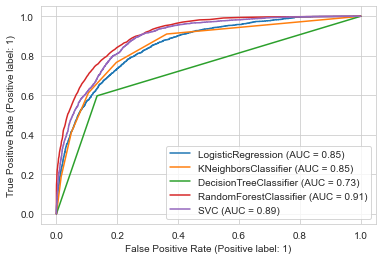

In [83]:
# Plotting roc_auc_curve

disp = plot_roc_curve(log_reg, x_test, y_test)
plot_roc_curve(knn, x_test, y_test, ax = disp.ax_)
plot_roc_curve(DT, x_test, y_test, ax = disp.ax_)
plot_roc_curve(RF, x_test, y_test, ax = disp.ax_)
plot_roc_curve(svc, x_test, y_test, ax = disp.ax_)
plt.show()

Random Forest Classifier has the highest AUC score so we are going to finalize Random Forest as our final model and we will hupertune the random forest model.

# Hyperparameter Tuning

In [84]:
# defining all the important estimators of Random Forest Algorithm for hyper tune the model.
param_grid = {'n_estimators' : [10,20,30,40,50,60,70,80,90,100], 
              'criterion' : ['gini', 'entropy'],
              'max_depth' : [2,4,6,8],
              'max_features' : ['auto', 'sqrt', 'log2'],
              'min_samples_split' : [2,4,6,8],
              'min_samples_leaf' : [1,3,5,7]
              }

In [85]:
# Training the grid_search cv with defined estimators to find best parameters to tune the algoithm
grid_search = GridSearchCV(estimator = RF, param_grid = param_grid, cv = 5, n_jobs = -1)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 3, 5, 7],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100]})

In [86]:
# getting best parameters 
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'log2',
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 20}

In [88]:
# training and testing the random forest model with tuned estimators
RFHT = grid_search.best_estimator_
RFHT.fit(x_train, y_train)
y_pred_rfht = RFHT.predict(x_test)

print('Confusion Matrix for Tuned Random Forest Model is :\n', confusion_matrix(y_test, y_pred_rfht),'\n')
print('Accuracy Score for Tuned Random Forest model is :\n', accuracy_score(y_test, y_pred_rfht),'\n')
print('Classification Report for Tuned Random Forest Model is :\n', classification_report(y_test, y_pred_rfht))

Confusion Matrix for Tuned Random Forest Model is :
 [[7168  320]
 [1075 1205]] 

Accuracy Score for Tuned Random Forest model is :
 0.8571867321867321 

Classification Report for Tuned Random Forest Model is :
               precision    recall  f1-score   support

           0       0.87      0.96      0.91      7488
           1       0.79      0.53      0.63      2280

    accuracy                           0.86      9768
   macro avg       0.83      0.74      0.77      9768
weighted avg       0.85      0.86      0.85      9768



Without tuned Random forest model accuracy is better than tuned random forest model so we are going to save The random forest model with default parameters.

# Model Saving

In [91]:
# saving the model with pickle
file_name = 'Census Income Project'
pickle.dump(RF, open(file_name, 'wb'))

# Loading & Predicting with Loaded Model & Conclusion.

In [92]:
loaded_model = pickle.load(open(file_name, 'rb'))
Prediction = loaded_model.predict(x_test)

In [93]:
Actual = y_test

## Conclusion.

In [94]:
# making data frame of predicted values and actual values
DF = pd.DataFrame([Prediction, Actual], index = ['Prediction', 'Actual'])
DF

,0,1,2,3,4,5,6,7,8,9,...,9758,9759,9760,9761,9762,9763,9764,9765,9766,9767
Prediction,1,1,0,0,0,0,0,0,0,1,...,1,0,1,0,0,0,0,0,0,0
Actual,1,1,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,1,0,0,0


The above Conclusion represents the accuracy of our model comparaing the predicted values and Actual values.

# Finished.
We have saved the model and predicted the test dataset with the Loaded Model. Than we have made a Data Frame of the Actual values and Predicted values with the loaded for a conclusion. Here we have finished the Model Building.
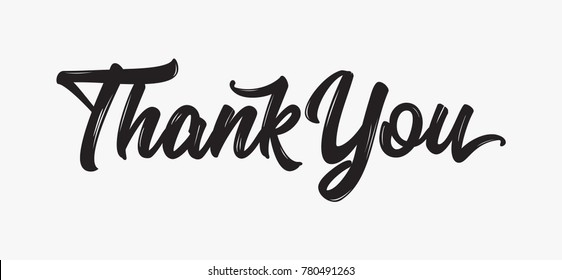